In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Исходной выборкой принята X, входными данными выбраны In1, In3

In [2]:
df = pd.read_excel('X_dat.xlsx')
Param = ['Tsys','OutK','OutW','In2','In4','In5']

In [3]:
df

,Tsys,OutW,OutK,In1,In2,In3,In4,In5
0,14260.207347,-4.372067,1.684068,-90.0,5092.174480,7.568569,7.603383,2.766608e-05
1,17860.113750,-4.395031,1.684086,-90.0,5092.248508,7.733917,7.755043,3.147119e-06
2,21460.017344,-4.396948,1.684095,-90.0,5092.285155,7.800454,7.824474,5.493316e-14
3,25059.939097,-4.466899,1.684189,-90.0,5092.464156,8.715562,8.791684,2.609611e-04
4,28659.869252,-4.604535,1.684474,-90.0,5093.527380,11.173874,11.232197,2.440854e-04
...,...,...,...,...,...,...,...,...
3955,295048.236700,-4.897853,1.688830,90.0,5108.666008,47.109053,47.114855,6.614512e-07
3956,302247.830955,-4.861724,1.688830,90.0,5108.667969,47.111374,47.105139,-1.626975e-13
3957,291448.434283,-4.869514,1.688830,90.0,5108.660645,47.111704,47.118901,3.904407e-13
3958,298648.048146,-4.890650,1.688830,90.0,5108.666992,47.113201,47.122764,1.298018e-13


In [4]:
train, test = np.split(df.sample(frac=1, random_state=3), [int(.85*len(df))])
train

,Tsys,OutW,OutK,In1,In2,In3,In4,In5
3031,256399.864325,-4.179633,1.706991,47.5,5106.646795,42.222492,42.214413,1.410404e-05
1364,91046.811844,-3.952695,1.648611,-27.5,5096.435088,17.658970,17.672556,3.894449e-08
72,116846.220809,-4.820259,1.683134,-87.5,5098.478272,22.545078,22.557463,-1.829012e-13
3048,47598.772508,-3.944346,1.706693,50.0,5094.299316,12.571225,12.598651,3.186340e-14
202,234000.611603,-5.351255,1.679812,-82.5,5105.940193,40.825559,40.863793,2.274219e-04
...,...,...,...,...,...,...,...,...
3053,65598.261796,-4.134217,1.706797,50.0,5095.676119,16.240174,16.296822,2.485107e-04
1925,98746.504633,-3.923127,1.669175,-2.5,5097.382593,20.444187,20.507652,2.847550e-04
3225,126945.624108,-4.063746,1.706795,57.5,5098.558049,22.964502,23.017600,1.443393e-04
501,93846.957061,-4.838688,1.660802,-67.5,5096.438233,17.664079,17.683205,1.220559e-15


В ходе выполнения работы было решено использовать сортировку исходных данных по полю времени Tsys, тем самым апроксимируется "большой эксперимент", а не множество повторящиюхся. Это возможно так как испытания многократно проводились при одинаковых условиях (допущение). Данные разделены в соотношении 70%:30% для обучающей и тестовой выборки, также проведено мин-макс масштабирование целевых функций [0;1]

In [5]:
train, test = np.split(df.sample(frac=1, random_state=3), [int(.7*len(df))])

train = train.sort_values(by=['Tsys'])
test =  test.sort_values(by=['Tsys'])

target_data_W = train.OutW
target_data_K = train.OutK

target_test_W = test.OutW
target_test_K = test.OutK
"""
target_data_W = (train.OutW - train.OutW.min()) / (train.OutW.max() - train.OutW.min())
target_data_K = (train.OutK - train.OutK.min()) / (train.OutK.max() - train.OutK.min())

target_test_W = (test.OutW - test.OutW.min()) / (test.OutW.max() - test.OutW.min())
target_test_K = (test.OutK - test.OutK.min()) / (test.OutK.max() - test.OutK.min())
"""
train = train.drop(Param, axis=1)
train_in1 = train[train.columns[0]]
train_in2 = train[train.columns[1]]

test= test.drop(Param, axis=1)
test_in1 = test[test.columns[0]]
test_in2 = test[test.columns[1]]

Обучение: Искомый параметр K

In [6]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

ANN_K = MLPRegressor(hidden_layer_sizes=(100,100,), max_iter = int(1e9), activation = 'logistic', solver = 'adam', learning_rate = 'adaptive',tol = 1e-16, random_state = 5)
ANN_K.fit(train,target_data_K)
predict_train_K = ANN_K.predict(train)
predict_test_K = ANN_K.predict(test)

print(f"Ошибки на обучающей выборке параметра K")
print(f"MAE {mean_absolute_error(target_data_K, predict_train_K):.10f}")
print(f"MSE {mean_squared_error(target_data_K, predict_train_K):.10f}")
print(f"MAX {max_error(target_data_K, predict_train_K):.10f}")
print(f"Accuracy {ANN_K.score(train,target_data_K):.10f}")
print(f"\n")
print(f"Ошибки на тестовой выборке параметра K")
print(f"MAE {mean_absolute_error(target_test_K, predict_test_K):.10f}")
print(f"MSE {mean_squared_error(target_test_K, predict_test_K):.10f}")
print(f"MAX {max_error(target_test_K, predict_test_K):.10f}")
print(f"Accuracy {ANN_K.score(test,target_test_K):.10f}")

Ошибки на обучающей выборке параметра K
MAE 0.0010224079
MSE 0.0000018099
MAX 0.0046180910
Accuracy 0.9962577714


Ошибки на тестовой выборке параметра K
MAE 0.0010346610
MSE 0.0000018493
MAX 0.0045894381
Accuracy 0.9960809630


Визуализация поверхностей и сечений по входным параметрам для обучающей выборки

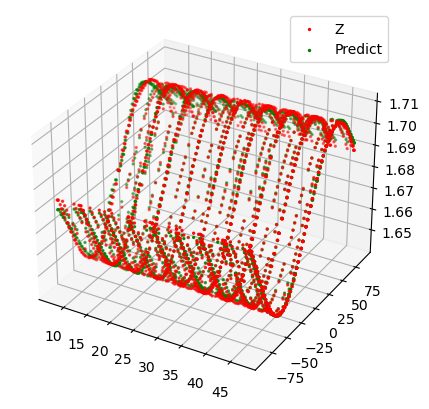

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_in2, train_in1, target_data_K, c = 'red', s = 2, label = 'Z')
ax.scatter(train_in2, train_in1, predict_train_K, c = 'green',  s = 2, label = 'Predict')
ax.legend()

Сечения графиков

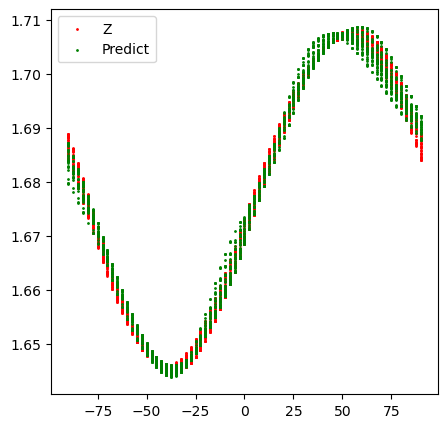

In [8]:
fig = plt.figure(figsize=(5,5))
plt.scatter(train_in1, target_data_K, c = 'red', s = 1, label = 'Z')
plt.scatter(train_in1, predict_train_K, c='green',  s = 1, label = 'Predict')
plt.legend()

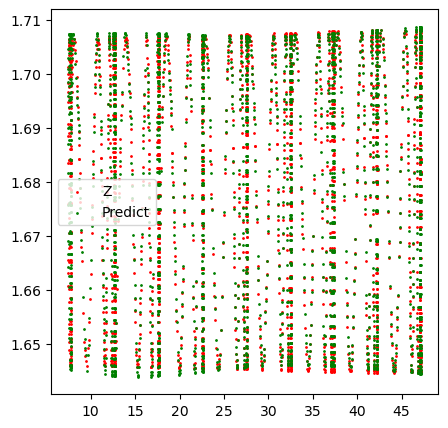

In [9]:
fig = plt.figure(figsize=(5,5))
plt.scatter(train_in2, target_data_K, c = 'red', s = 1, label = 'Z')
plt.scatter(train_in2, predict_train_K, c='green',  s = 1, label = 'Predict')
plt.legend()

Визуализация поверхностей и сечений по входным параметрам для тестовой выборки

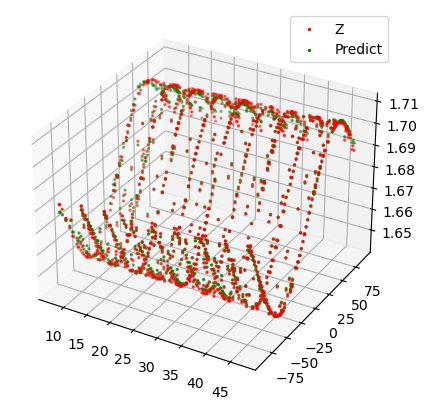

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_in2, test_in1, target_test_K, c = 'red', s = 2, label = 'Z')
ax.scatter(test_in2, test_in1, predict_test_K, c = 'green',  s = 2, label = 'Predict')
ax.legend()

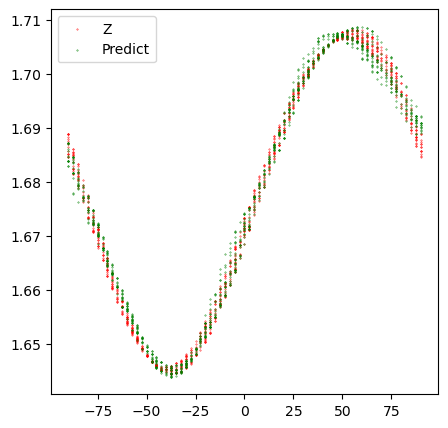

In [11]:
fig = plt.figure(figsize=(5,5))
plt.scatter(test_in1, target_test_K, c = 'red', s = 0.1, label = 'Z')
plt.scatter(test_in1, predict_test_K, c='green',  s = 0.1, label = 'Predict')
plt.legend()

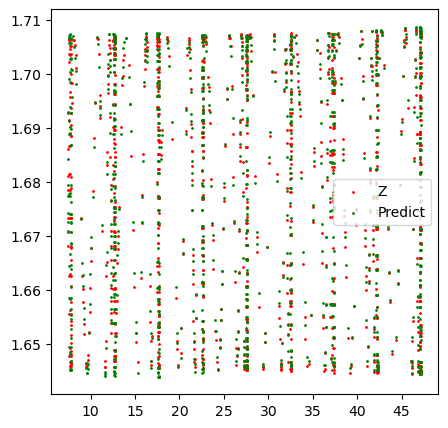

In [12]:
fig = plt.figure(figsize=(5,5))
plt.scatter(test_in2, target_test_K, c = 'red', s = 1, label = 'Z')
plt.scatter(test_in2, predict_test_K, c='green',  s = 1, label = 'Predict')
plt.legend()

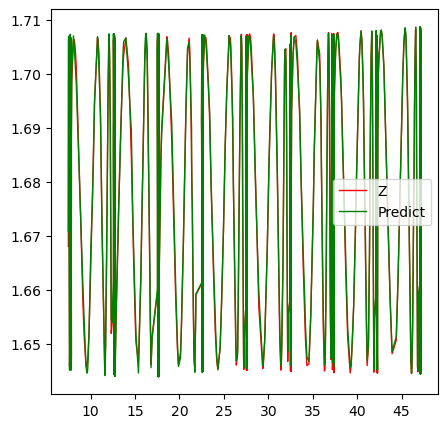

In [13]:
fig = plt.figure(figsize=(5,5))
plt.plot(test_in2, target_test_K, c = 'red', linewidth = 1, label = 'Z')
plt.plot(test_in2, predict_test_K, c='green',  linewidth = 1, label = 'Predict')
plt.legend()

Ниже проведена аналогичная работа для параметра W.

In [29]:
ANN_W = MLPRegressor(hidden_layer_sizes=(1000,1000,),max_iter = int(1e32), activation = 'logistic', solver = 'adam', learning_rate = 'adaptive',tol = 1e-16, random_state = 5)
ANN_W.fit(train,target_data_W)
predict_train_W = ANN_W.predict(train)
predict_test_W = ANN_W.predict(test)

print(f"Ошибки на обучающей выборке параметра W")
print(f"MAE {mean_absolute_error(target_data_W, predict_train_W):.10f}")
print(f"MSE {mean_squared_error(target_data_W, predict_train_W):.10f}")
print(f"MAX {max_error(target_data_W, predict_train_W):.10f}")
print(f"Accuracy {ANN_W.score(train,target_data_W):.10f}")
print(f"\n")
print(f"Ошибки на тестовой выборке параметра W")
print(f"MAE {mean_absolute_error(target_test_W, predict_test_W):.10f}")
print(f"MSE {mean_squared_error(target_test_W, predict_test_W):.10f}")
print(f"MAX {max_error(target_test_W, predict_test_W):.10f}")
print(f"Accuracy {ANN_W.score(test,target_test_W):.10f}")

Ошибки на обучающей выборке параметра W
MAE 0.1593046551
MSE 0.0392034205
MAX 0.6870666076
Accuracy 0.8749396476


Ошибки на тестовой выборке параметра W
MAE 0.1588932705
MSE 0.0388841020
MAX 0.6408890480
Accuracy 0.8787654918


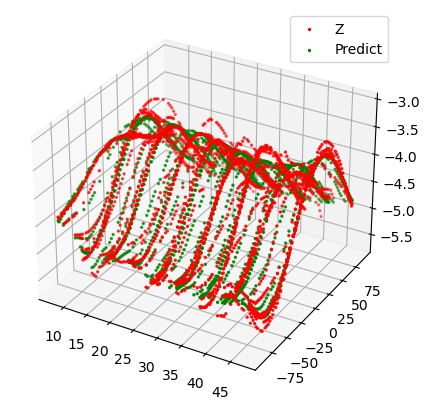

In [15]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_in2, train_in1, target_data_W, c = 'red', s = 2, label = 'Z')
ax.scatter(train_in2, train_in1, predict_train_W, c = 'green',  s = 2, label = 'Predict')
ax.legend()

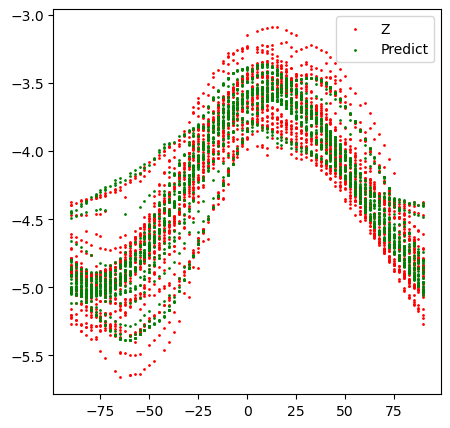

In [16]:
fig = plt.figure(figsize=(5,5))
plt.scatter(train_in1, target_data_W, c = 'red', s = 1, label = 'Z')
plt.scatter(train_in1, predict_train_W, c='green',  s = 1, label = 'Predict')
plt.legend()

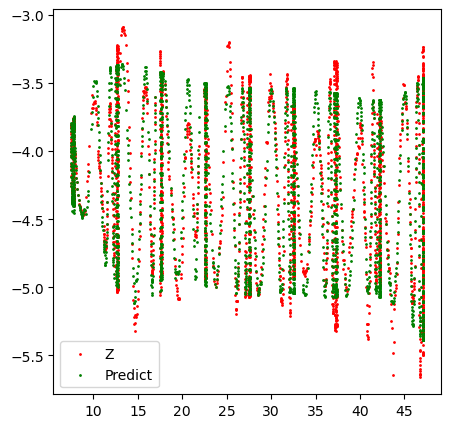

In [17]:
fig = plt.figure(figsize=(5,5))
plt.scatter(train_in2, target_data_W, c = 'red', s = 1, label = 'Z')
plt.scatter(train_in2, predict_train_W, c='green',  s = 1, label = 'Predict')
plt.legend()

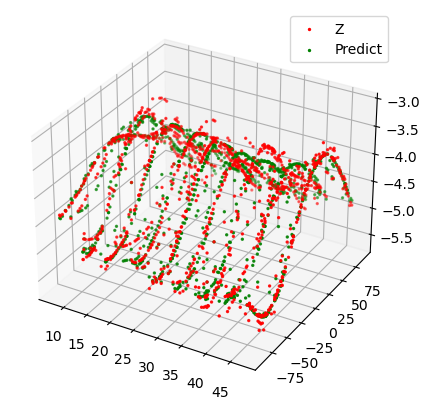

In [18]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_in2, test_in1, target_test_W, c='red', s=2, label='Z')
ax.scatter(test_in2, test_in1, predict_test_W, c='green', s=2, label='Predict')
ax.legend()

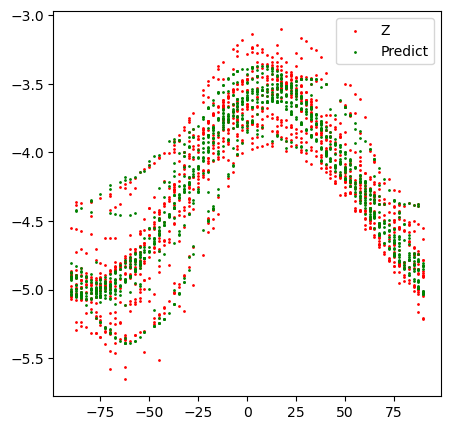

In [19]:
fig = plt.figure(figsize=(5,5))
plt.scatter(test_in1, target_test_W, c = 'red', s = 1, label = 'Z')
plt.scatter(test_in1, predict_test_W, c='green',  s = 1, label = 'Predict')
plt.legend()

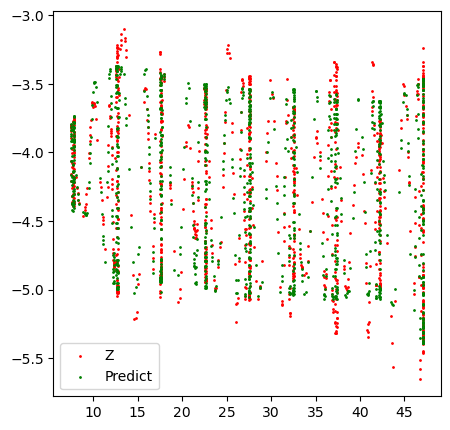

In [20]:
fig = plt.figure(figsize=(5,5))
plt.scatter(test_in2, target_test_W, c = 'red', s = 1, label = 'Z')
plt.scatter(test_in2, predict_test_W, c='green',  s = 1, label = 'Predict')
plt.legend()

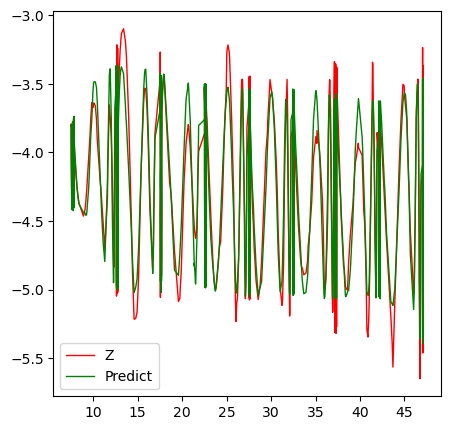

In [21]:
fig = plt.figure(figsize=(5,5))
plt.plot(test_in2, target_test_W, c = 'red', linewidth = 1, label = 'Z')
plt.plot(test_in2, predict_test_W, c='green',  linewidth = 1, label = 'Predict')
plt.legend()

Заключение: Исходя из проделанной работы можно сделать следующие выводы:
    1) Входные данные In1 и In3 являются достаточными для апроксимации поверхности outK, c точностью более 99%
    2) Аппроксимация поверхности outW по входным данным In1 и In3 имеет точность 94%, что является недостаточным показателем. Предплагаемым решением может быть расширение пространства входных данных, использование входных переменных In2, In4, In5. Также важно отметить, что в работе не использовалась предобработка данных, которая может повысить точность аппроксимации.

In [22]:
x = zip(range(3),range(3))
y = (*x)[0]


SyntaxError: can't use starred expression here (168748513.py, line 2)